# DSCI 100 Final Project
# "Can the age of a player predict their experience level?"

## Introduction
This report analyzes data collected by a research group in Computer Science at UBC led by Frank Wood. The data collected is about how people play video games, which is done by setting up a MineCraft server. This server records players actions as they navigate through the world. In order to run the project successfully, the researchers must understand how they should target their recruitment efforts and whether they have enough resources. 

This report will be interested in analyzing what “kinds” of players are most likely contributing to a large amount of data in order to target those players during recruiting efforts. More specifically, the report will answer whether **the player’s age can predict the experience level of the player**. This will be completed by utilizing the data supplied by the players.csv dataset, which includes a list of all unique players, including their player data. 

### Details about players.csv
- **Number of observations**: 196
- **Number of variables**: 7
- **Information about variables:**

| Variable              | Data Type    | Description |
|----------------------|--------|-------------|
| `experience`        | Character | The Player's level of experience |
| `subscribe`         | Logical | If the player is subscribed or not |
| `hashedEmail`           | Character | Identifcation for each player |
| `played_hours`| Double | Number of hours the player has spent playing the game |
| `name`  | Character | The name of the player |
| `gender`  | Character | The gender the player identifies with |
| `Age`  | Double | The age of the player |

## Methods and Results
To investigate the relationship between age and experience level, a K-Nearest Neighbors (KNN) classification model was used. KNN is suitable for non-linear relationships and for classifying categorical outcomes, making it ideal for predicting experience levels (a categorical variable) based on age (a numerical variable).

The code implementing these methods is presented in the following sections.

### Loading The Data Into R

In [15]:
library(tidyverse)
library(tidymodels)
library(repr)

url <- "https://raw.githubusercontent.com/ArabellaKel/DSCI_project/refs/heads/main/players_DSCIproject.csv" 

players_data <- read_csv(url)

head(players_data)
tail(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Tidying and Wrangling Data

We tidied the dataset to prepare it for analysis. This included converting the Age column to integer format, and transforming both gender and experience into factors (categorical variables). These steps are essential for visualization and for later classification modeling.

In [4]:
library(lubridate)

# tidy data 
players_tidy <- players_data |>
    mutate ( Age = as.integer(Age),
            gender = as.factor(gender),
           experience = as.factor(experience))
players_tidy <- players_tidy |>
    drop_na()
head(players_tidy)
tail(players_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0.0,Orion,Male,17
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


### Summary Statistics on Dataset

We then generated summary statistics for key numerical variables: played_hours and Age. This helped us understand the data’s range and central tendencies, including the average age and mean time spent playing.

In [5]:
library(tidyverse)
library(tidymodels)

players_statistics <- players_tidy |>
summarize (max_played_hours = max(played_hours),
           min_plyed_hours = min(played_hours),
           mean_plyed_hours = mean(played_hours),
           max_age = max(Age, na.rm = TRUE),
           min_age = min(Age, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
players_statistics

max_played_hours,min_plyed_hours,mean_plyed_hours,max_age,min_age,mean_age
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
223.1,0,5.904639,50,8,20.52062


### Exploratory Data Visualization

To visualize the dataset and explore potential patterns between variables, we created two informative plots:

#### Figure 1: Scatter Plot of Time Played vs. Age and Experience Level

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”


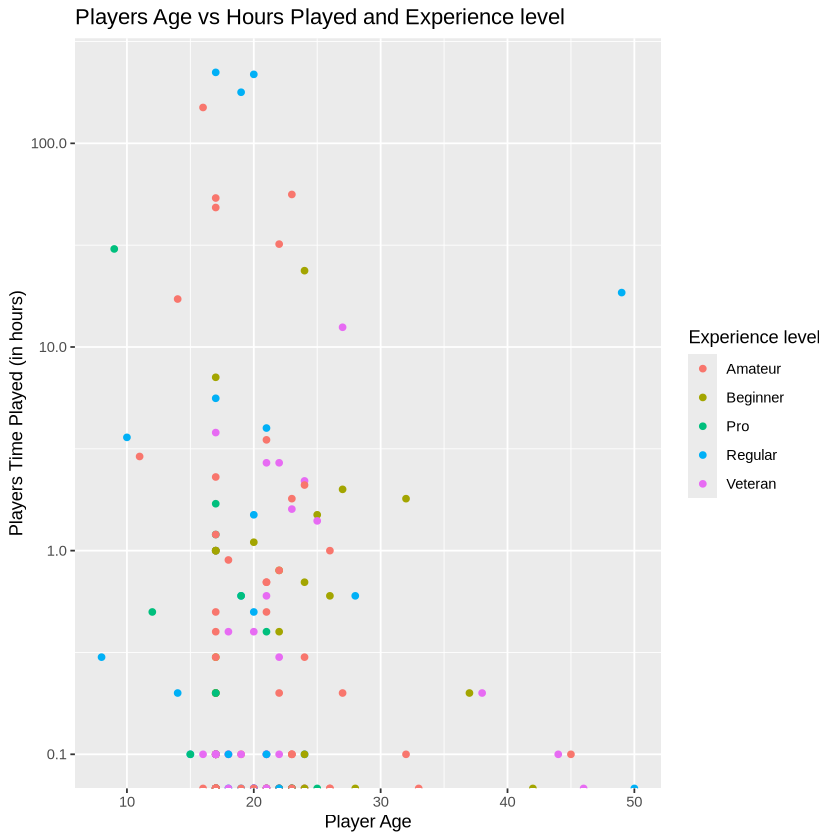

In [6]:
players_plot_1 <- players_tidy |>
ggplot(aes(x = Age, y = played_hours, colour = experience))+
       geom_point() +
       labs(x = "Player Age", y = "Players Time Played (in hours)" , colour = "Experience level", title = "Players Age vs Hours Played and Experience level") +
    scale_y_log10(labels = comma)
players_plot_1

#### Figure 2: Histogram of Players Age vs. Experience Level

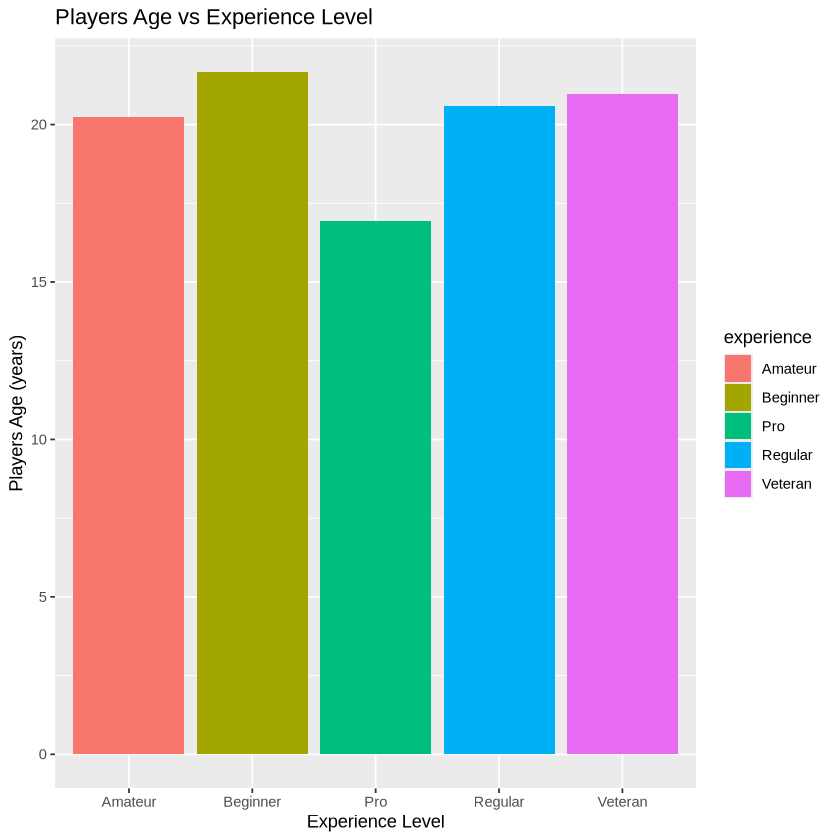

In [7]:
players_tidy_mean <- players_tidy |>
    group_by(experience) |>
    summarize(mean_age = mean(Age, na.rm = TRUE))

players_plot_2 <- players_tidy_mean |> 
ggplot(aes(x = experience, y = mean_age, fill = experience))+
       geom_bar(stat = "identity") +
       labs(x = "Experience Level", y = "Players Age (years)", title = "Players Age vs Experience Level") 
players_plot_2

#### Relevant Insights From The Visualizations

From the first scatter plot, there are no specific trends related to age and experience level, however, there is a slight negative relationship between age and time spent playing the game. This is because the graph shows more people between the ages of 10 and 30 spend much more time playing the game than players of other ages, the most hours played being around the age of 20.

The second histogram plot highlights that the mean age of players with pro experience are on average younger in age. This is because the bar for pro experience level has a age of around 17, while all the other experience level's indicate average ages of over 20 years old. Beginner experience level has the highest age.

### Data Analysis

The following code builds and tunes a K-Nearest Neighbors (KNN) model to determine whether a player’s age can predict their experience level in Minecraft. It involves preparing the data, training an initial model, performing cross-validation, tuning the number of neighbors (K), and selecting the best-performing model.
- Sets a seed for reproducibility
- Selects only the necessary columns: Age and experience
- Splits the data into training (75%) and testing (25%) sets using stratified sampling
- Scales and centers the age variable to prepare for distance-based modeling
- Builds an initial KNN model using K = 3 as a baseline
- Predicts experience levels on the test data
- Performs 5-fold cross-validation to assess model performance
- Tunes K by testing values from 1 to 10
- Filters and collects cross-validated accuracy results
- Visualizes accuracy estimates across different K values
- Identifies and stores the best K value based on highest accuracy

[1] 7

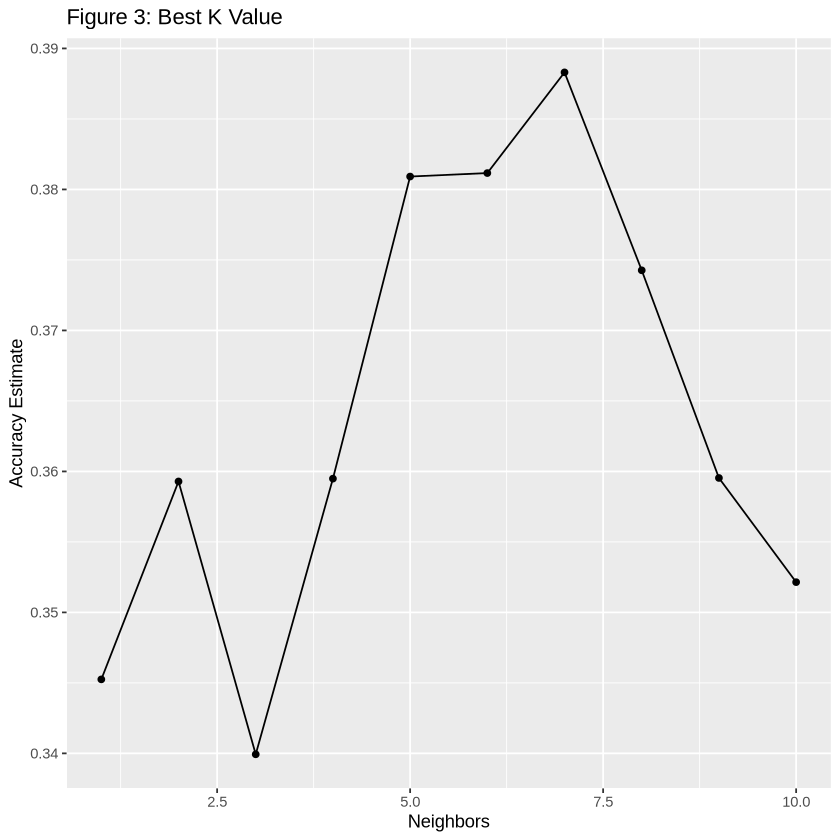

In [16]:
set.seed(3456) 

# Manipulate dataset to only contain necessary variables
players_model <- players_tidy |>
    select(Age, experience)

# Splitting data into training and testing
players_split <- initial_split(players_model, prop = 0.75, strata = experience)
players_train <- training(players_split)
players_test <- testing(players_split)

# Scale and center the data
players_recipe <- recipe(experience ~ Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Create classifier with training data and K = 3
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

# Predict in testing data
players_test_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test)

# Cross-validation
players_vfold <- vfold_cv(players_train, v = 5, strata = experience)
players_resample_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = players_vfold)
players_metrics <- collect_metrics(players_resample_fit)

# Determine best K value
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |> 
    filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 3: Best K Value")
accuracy_versus_k

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

Based from the plot, the model is performed best with a **K = 7**, achieving an accuracy of approximately **0.389**.

#### Final Model Evaluation

This code builds and evaluates the final KNN model using the optimal number of neighbors (`best_k`) identified through tuning. The model is trained on the full training set and then used to predict experience levels for the test set. The predicted values are compared to the actual labels, and the model’s accuracy is calculated. This final step assesses how well the model generalizes to new, unseen data.

In [18]:
# Evaluate the test set
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions |>
  metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.24


#### Figure 4. Confusion matrix showing model classification performance across experience levels.

In [19]:
confusion_mat <- players_test_predictions |>
    conf_mat(truth = experience, estimate = .pred_class)
confusion_mat

          Truth
Prediction Amateur Beginner Pro Regular Veteran
  Amateur        7        7   2       3       9
  Beginner       5        2   1       3       2
  Pro            0        0   0       0       0
  Regular        2        0   1       3       1
  Veteran        1        1   0       0       0

#### Figure 5. Visualization of the Analysis (Prediction Accuracy by Age)

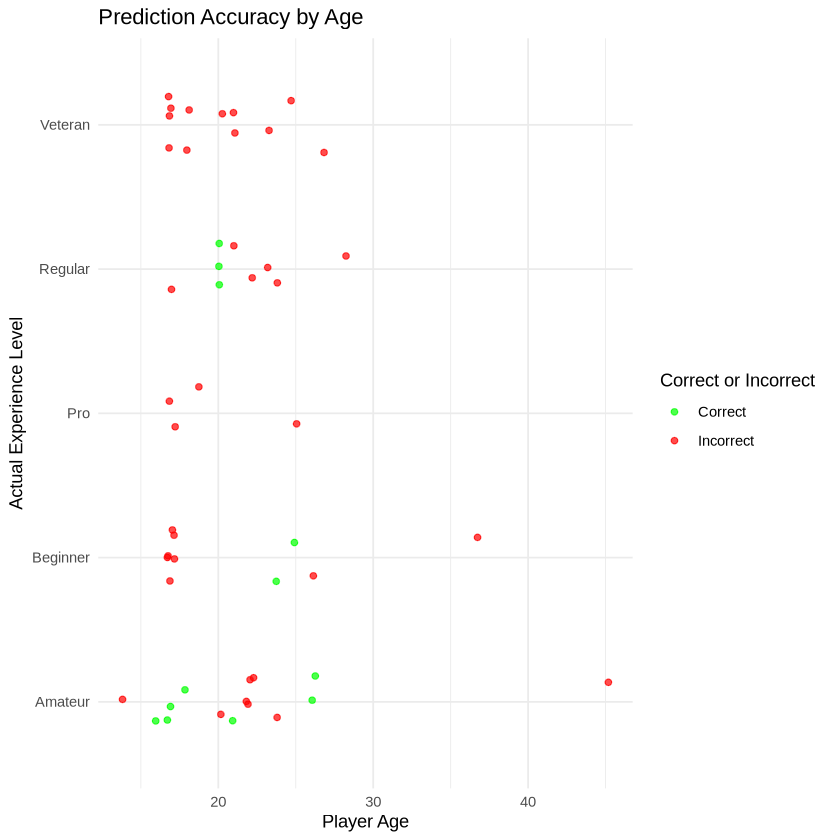

In [20]:
# Add column for correct/incorrect
players_test_predictions <- players_test_predictions |>
    mutate(correct = if_else(experience == .pred_class, "Correct", "Incorrect"))

# Scatter plot by age and experience
ggplot(players_test_predictions, aes(x = Age, y = experience, color = correct)) +
    geom_jitter(width = 0.3, height = 0.2, alpha = 0.7) +
    labs(title = "Prediction Accuracy by Age",
        x = "Player Age",
         y = "Actual Experience Level",
         color = "Correct or Incorrect") +
    scale_color_manual(values = c("Correct" = "green", "Incorrect" = "red")) +
    theme_minimal()

## Discussion

The analysis reveals that **age alone is a weak predictor** of a Minecraft player’s experience level. With the highest cross-validated model accuracy just under 40%, the model was only slightly better than random guessing.

These results were not entirely surprising. While age may influence exposure to gaming, experience level likely depends on many more factors—such as total time spent playing, familiarity with similar games, and even motivation or gaming habits. These elements were not captured in our model, limiting its effectiveness.

The **confusion matrix (Figure 4)** showed that the model often confused neighboring experience categories, such as “beginner” vs. “amateur” This reinforces the notion that age differences alone do not cleanly separate player skill levels.

The **scatter plot (Figure 5)** further supports this conclusion. Players of the same age were spread across all experience levels, and the model made incorrect predictions across all age groups. There was no clear pattern that linked a specific age group to a particular experience category. This visualization makes it evident that the relationship between age and experience is too weak and noisy to support accurate classification using KNN with age alone.

These findings suggest that researchers should incorporate additional gameplay metrics (e.g., playing time, in-game achievement data, frequency of play) for more accurate predictions. Age might be a useful supplementary variable, but not a sufficient standalone predictor. As a result, it can not be analyzed what experience level of players are likely contributing a large amount of data to the different ages, as player's age can not ultiamtely predict the experience level of the player.  

Impact:
- The current model has limited predictive power but highlights the importance of thoughtful feature selection for the game.
- Future recruitment or resource planning should be cautious about using demographic info such as age to infer experience.

Future Questions:
- Can incorporating behavioral data improve the predictive model?
- Do combinations of variables (e.g., age + session count) yield better results?
- Are there non-obvious behavioral patterns that predict experience better than age?